# STEP:1: capturing the car 

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
while(cap.isOpened()):
  ret, frame = cap.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  cv2.imshow('frame',gray)
  if cv2.waitKey(10) == 13:
    break

cap.release()
cv2.destroyAllWindows()

# STEP:2: Filtering the image

In [2]:
import imutils
import easyocr
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edge = cv2.Canny(bfilter, 30, 200)
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
loc = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        loc = approx
        break
mask = np.zeros(gray.shape, np.uint8)
nimg = cv2.drawContours(mask, [loc], 0,255, -1)
nimg = cv2.bitwise_and(frame, frame, mask=mask)
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
c_image = gray[x1:x2+1, y1:y2+1]
reader = easyocr.Reader(['en'])
result = reader.readtext(c_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# STEP:3: Showing the detected number plate

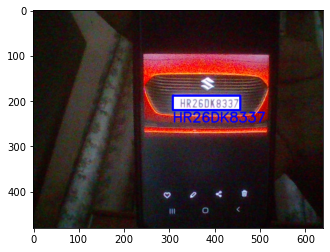

In [3]:
from matplotlib import pyplot as plt

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(frame, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(frame, tuple(approx[0][0]), tuple(approx[2][0]), (255,0,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

# STEP:4: Display plate No

In [4]:
print(text)

HR26DK8337
